<a href="https://colab.research.google.com/github/koDELLL/MachineLearning/blob/main/WEEK%207/Worksheet_of_7_XGBoost2_data_melb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Learn on how to build and optimize model with **gradient boosting.**

#Introduction
By definition, **ensemble methods** combine the predictions of several models (e.g., several trees, in the case of random forest).

Now, we'll learn about another ensemble method called gradient boosting.

#Difference of Decision Tree, Random Forest, and XGBoost

1. Decision Tree:
A decision tree is a simple and interpretable model that recursively splits the data into subsets based on the feature values. It forms a tree-like structure where each internal node represents a test on a feature, each branch represents the outcome of that test, and each leaf node represents the final prediction. The decision tree makes binary decisions at each node to split the data. It is prone to overfitting, especially when the tree becomes deep, capturing noise and leading to poor generalization on unseen data.

2. Random Forest:
Random Forest is an ensemble learning method that builds multiple decision trees and combines their predictions through voting (for classification) or averaging (for regression). Each decision tree is trained on a random subset of the data (bootstrap sample) and a random subset of the features. This randomness reduces overfitting and increases the model's ability to generalize to new data.

3. XGBoost (Extreme Gradient Boosting):
XGBoost is an optimized implementation of the Gradient Boosting algorithm. It creates an ensemble of weak learners (usually shallow decision trees) sequentially, where each new model corrects the errors made by the previous one. XGBoost uses a gradient-based optimization algorithm to minimize a loss function while adding new trees to the ensemble. It also includes regularization terms to control overfitting and speed up the training process. XGBoost is known for its high performance, scalability, and efficiency, making it popular in various machine learning competitions and real-world applications.
**XGBoost** is an implementation of gradient boosting with several additional features focused on perfmance and speed. The final result of an XGBoost model is a weighted sum of the predictions made by all the individual trees in the sequence. The contribution of each tree is adjusted during training based on how well it reduces the overall error.


Note:

* Regularization (penyederhanaan): XGBoost introduces regularization terms to control overfitting during the training process. Regularization helps prevent the model from becoming too complex and ensures better generalization to unseen data.


#Gradient Boosting

**Gradient boosting** is a method that goes through cycles to iteratively add models into an ensemble (setelan).

It begins by initializing the ensemble with a single model, whose predictions can be pretty naive. (Even if its predictions are wildly inaccurate, subsequent (kemudian) additions to the ensemble will address those errors.)

Then, we start the cycle:
1. First, we use the current ensemble to generate predictions for each observation in the dataset. To make a prediction, we **add the predictions from all models** in the ensemble.
2. These predictions are used to calculate a loss function (like mean squared error, for instance).
3. Then, we use the loss function to fit a new model that will be added to the ensemble. Specifically, we determine model parameters so that adding this new model to the ensemble will reduce the loss.
4. Finally, we add the new model to ensemble, and ...
5. Repeat!

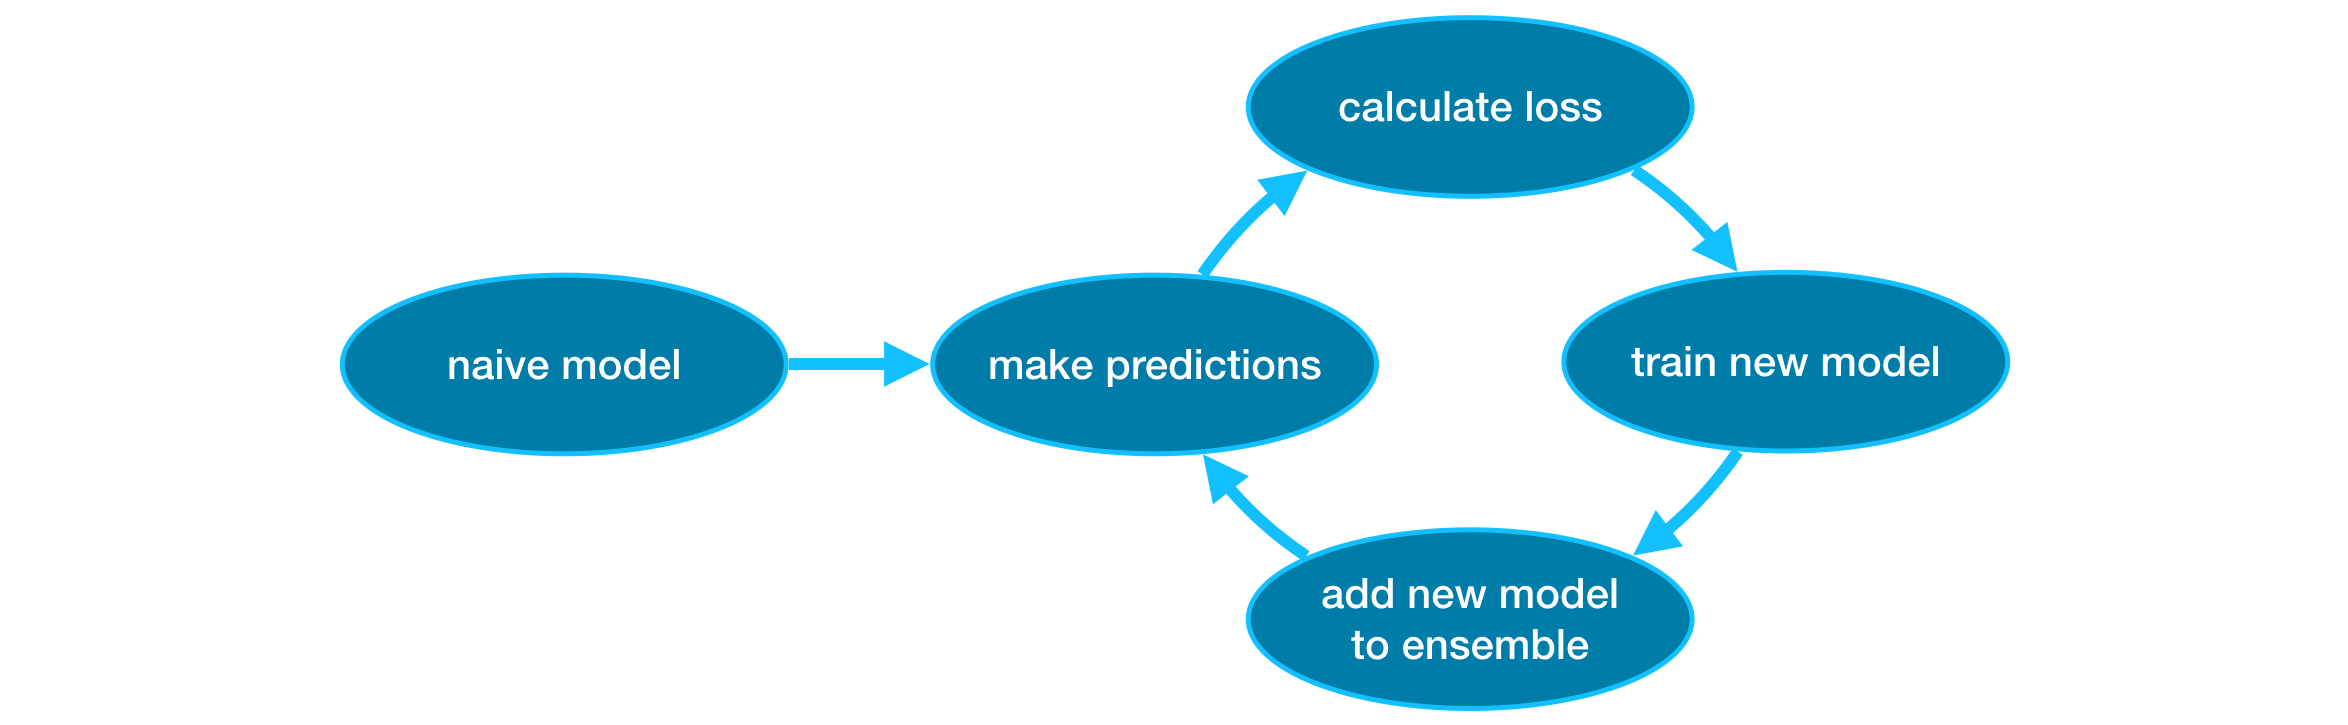

#Example
We begin by loading the training and validation data in X_train, X_valid, y_train, y_valid.

In [ ]:
!pip install scikit-learn==1.1.3

In [ ]:
!pip install shap

**Prompt:**

Write a code cell to mount Google Drive in Colab.

In [ ]:
# Untuk mengabilkan dataset dari google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Prompt:**

Write a code cell to read a CSV file from Google Drive into a DataFrame.

In [ ]:
import pandas as pd

# Specify the path to your CSV file on Google Drive
file_path = '/content/drive/MyDrive/Dataset/tugasxgboost2.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)
df = pd.read_csv(file_path, delimiter=';')

# Display the first few rows of the DataFrame
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


**Prompt:**

Write a code cell to select a subset of predictors ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt'] and set the target variable ['Price'] from the DataFrame.

In [ ]:
# Specify the list of predictor column names (features)
predictors = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
              'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

# Specify the target variable (the column you want to predict)
target = 'quality'

# Select the predictors subset
X = df[predictors]

# Select the target variable
y = df[target]

# Display the predictors and target
print("Predictors (X):")
print(X.head())

print("\nTarget (y):")
print(y.head())


Predictors (X):
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  
0      8.8  
1      9.5  
2     10.1  
3      9.9  
4    

**Prompt:**

Write a code cell to split the data into training and validation

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the resulting datasets
print(f"Training features (X_train): {X_train.shape}")
print(f"Validation features (X_val): {X_val.shape}")
print(f"Training target (y_train): {y_train.shape}")
print(f"Validation target (y_val): {y_val.shape}")


Training features (X_train): (3918, 11)
Validation features (X_val): (980, 11)
Training target (y_train): (3918,)
Validation target (y_val): (980,)


In the next code cell, we import the scikit-learn API for XGBoost (`xgboost.XGBRegressor`). As you'll see in the output, the `XGBRegressor` class has many tunable parameters.


**Prompt:**

Write a code cell to train the model using XGBoost, and print the mean absolute error on the validation set.

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

# Convert the DataFrame into DMatrix, which is the internal data structure for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

# Set the parameters for XGBoost
params = {
    'objective': 'reg:squarederror',  # For regression task (change to 'binary:logistic' for classification)
    'eval_metric': 'mae',  # Evaluate using Mean Absolute Error
    'max_depth': 6,  # Maximum depth of trees
    'learning_rate': 0.1,  # Step size at each iteration
    'n_estimators': 100  # Number of boosting rounds (trees)
}

# Train the XGBoost model
model = xgb.train(params, dtrain, num_boost_round=100, evals=[(dval, 'eval')], early_stopping_rounds=10)

# Make predictions on the validation set
y_pred = model.predict(dval)

# Calculate the Mean Absolute Error on the validation set
mae = mean_absolute_error(y_val, y_pred)

# Print the Mean Absolute Error
print(f"Mean Absolute Error (MAE) on the validation set: {mae}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [09:50:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	eval-mae:0.64988
[1]	eval-mae:0.63079
[2]	eval-mae:0.61674
[3]	eval-mae:0.60584
[4]	eval-mae:0.59801
[5]	eval-mae:0.59079
[6]	eval-mae:0.58364
[7]	eval-mae:0.57811
[8]	eval-mae:0.57334
[9]	eval-mae:0.56784
[10]	eval-mae:0.56304
[11]	eval-mae:0.55909
[12]	eval-mae:0.55604
[13]	eval-mae:0.55272
[14]	eval-mae:0.54857
[15]	eval-mae:0.54586
[16]	eval-mae:0.54388
[17]	eval-mae:0.54181
[18]	eval-mae:0.53860
[19]	eval-mae:0.53463
[20]	eval-mae:0.53337
[21]	eval-mae:0.53037
[22]	eval-mae:0.52825
[23]	eval-mae:0.52680
[24]	eval-mae:0.52567
[25]	eval-mae:0.52419
[26]	eval-mae:0.52352
[27]	eval-mae:0.52220
[28]	eval-mae:0.52065
[29]	eval-mae:0.51917
[30]	eval-mae:0.51826
[31]	eval-mae:0.51647
[32]	eval-mae:0.51553
[33]	eval-mae:0.51472
[34]	eval-mae:0.51345
[35]	eval-mae:0.51273
[36]	eval-mae:0.51132
[37]	eval-mae:0.51081
[38]	eval-mae:0.51025
[39]	eval-mae:0.51006
[40]	eval-mae:0.50973
[41]	eval-mae:0.50928
[42]	eval-mae:0.50935
[43]	eval-mae:0.50832
[44]	eval-mae:0.50805
[45]	eval-mae:0.5080

We also make predictions and evaluate the model.

#Parameter Tuning
XGBoost has a few parameters that can dramatically affect accuracy and training speed. The first parameters you should understand are:

`n_estimators`
Specifies how many times to go through the modeling cycle described above. It is equal to the number of models that we include in the ensemble.
* Too low a value causes underfitting, which leads to inaccurate predictions on both training data and test data.
* Too high a value causes overfitting, which causes accurate predictions on training data, but inaccurate predictions on test data (which is what we care about).

Typical values range from 100-1000, though this depends a lot on the `learning_rate` parameter discussed below.

Here is the code to set the number of models in the ensemble:

**Prompt:**

Write a code cell to create another XGBRegressor with 500 estimators, train it, and print the mean absolute error on the validation set.

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Create the XGBRegressor model with 500 estimators
model_xgb = XGBRegressor(n_estimators=500, learning_rate=0.1, max_depth=6, objective='reg:squarederror')

# Train the model on the training data
model_xgb.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_xgb = model_xgb.predict(X_val)

# Calculate the Mean Absolute Error on the validation set
mae_xgb = mean_absolute_error(y_val, y_pred_xgb)

# Print the Mean Absolute Error
print(f"Mean Absolute Error (MAE) on the validation set: {mae_xgb}")


Mean Absolute Error (MAE) on the validation set: 0.40974705438224635


The MAE result of the model with n_estimators set to 500 turned out to be greater than the default value of n_estimators, which is 100.

The MAE (Mean Absolute Error) of the model with an n_estimators value of 110 turns out to be smaller than the default n_estimators value of 100, as well as n_estimators with a value of 500.

`early_stopping_rounds`
offers a way to automatically find the ideal value for `n_estimators`. Early stopping causes the model to stop iterating when the validation score stop improving, even if we aren't the hard stop for `n_estimators`. It's smart to set a high value for `n_estimators` and then use `early_stopping_rounds` to find the optimal time to stop iterating.

Since random chance sometimes causes a single round where validation scores don't improve, you need to specify a number for how many rounds of straight deterioration (keburukan) to allow before stopping. Setting `early_stopping_rounds=5` is a reasonable choice. In this case, we stop after 5 straight rounds of deteriorating validation scores.

When using `early_stopping_rounds`, you also need to set aside some data for calculating the validation scores. This is done by setting the `eval_set` parameter.

We can modify the example above to include early stopping.

---
Note:

* In the context of training machine learning models, "deteriorating" refers to a situation where the performance of the model on a validation dataset worsens over consecutive iterations during the training process. Typically, we monitor a metric (such as accuracy, mean squared error, etc.) on the validation dataset to evaluate the model's performance.

* In the given code, verbose=False is an argument passed to the fit method of the XGBRegressor model. Setting verbose to False means that during the training process, the model will not produce any output or progress messages. It will train silently without displaying information about each boosting round.

`n_jobs`

On larger datasets where runtime is a consideration, you can use parallelism to build your model faster. It's common to set the parameter `n_jobs` equal to the number of cores on your machine. On smaller datasets, this won't help.
The resulting model won't be any better, so micro-optimizing for fitting time is typically nothing but a distraction. But, it's useful in large datasets where you would otherwise spend a long time waiting during the `fit` command.

Here's the modified example.

**Prompt:**

Write a code cell to train an XGBRegressor with a custom learning rate, 90 estimators, and early stopping rounds, and print the mean absolute error on the validation set.

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Load your dataframe (replace this with your own data)
# df = pd.read_csv('your_file.csv')  # Uncomment this line if you load data from CSV

# Define features and target
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
        'pH', 'sulphates', 'alcohol']]  # Features (predictors)

y = df['quality']  # Target (labels)

# Split the data into training and validation sets (80% train, 20% validation)
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the training and validation data to DMatrix format
dtrain = xgb.DMatrix(train_X, label=train_y)
dval = xgb.DMatrix(val_X, label=val_y)

# Set the parameters for the XGBoost model
params = {
    'objective': 'reg:squarederror',  # For regression task
    'eval_metric': 'mae',             # Mean Absolute Error as evaluation metric
    'learning_rate': 0.05,            # Custom learning rate
    'max_depth': 6                    # Maximum depth of trees
}

# Train the XGBoost model with early stopping
model_custom = xgb.train(
    params,
    dtrain,
    num_boost_round=90,             # Maximum number of boosting rounds (estimators)
    evals=[(dval, 'eval')],         # Validation set for early stopping
    early_stopping_rounds=10,       # Stop after 10 rounds with no improvement
    verbose_eval=False              # Turn off verbose output during training
)

# Make predictions on the validation set
val_predictions_custom = model_custom.predict(dval)

# Calculate Mean Absolute Error (MAE) on the validation set
mae_custom = mean_absolute_error(val_y, val_predictions_custom)

# Print the Mean Absolute Error
print("Mean Absolute Error pada set validasi dengan learning rate 0.05 dan 90 estimator:", mae_custom)


Mean Absolute Error pada set validasi dengan learning rate 0.05 dan 90 estimator: 0.5049270702868092


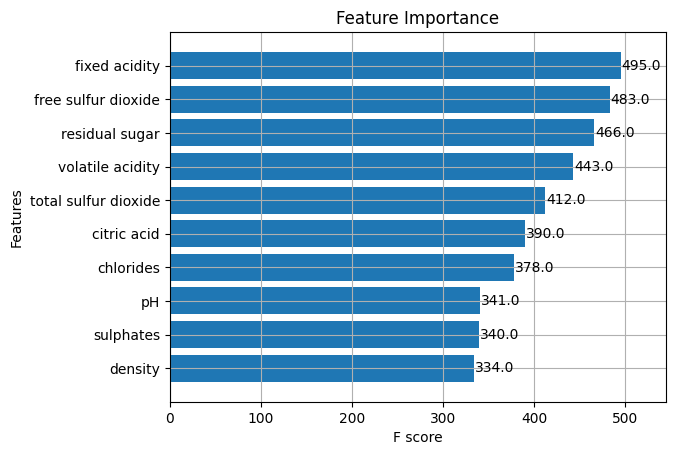

In [ ]:
import matplotlib.pyplot as plt

# Visualize Feature Importance
xgb.plot_importance(model_custom, importance_type='weight', max_num_features=10, height=0.8)
plt.title("Feature Importance")
plt.show()


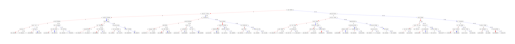

<Figure size 3000x4000 with 0 Axes>

In [ ]:
# Visualize the structure of the first tree
xgb.plot_tree(model_custom, num_trees=0)
plt.figure(figsize=(30, 40))  # Adjust the size for better readability
plt.show()


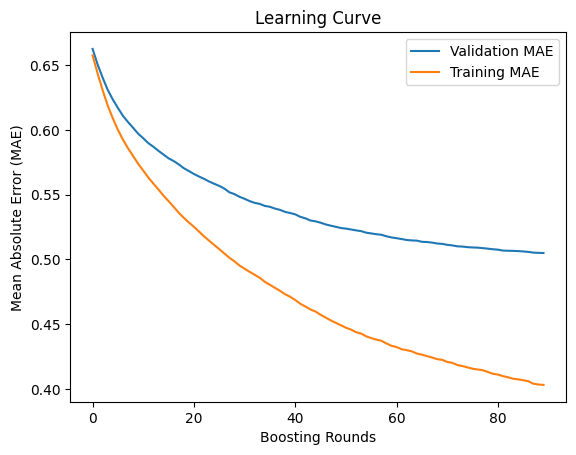

In [ ]:
# Train the model again and capture evaluation results for plotting the learning curve
evals_result = {}
model_custom = xgb.train(
    params,
    dtrain,
    num_boost_round=90,
    evals=[(dtrain, 'training'), (dval, 'eval')], # Include training data for evaluation
    early_stopping_rounds=10,
    evals_result=evals_result,  # Capture evaluation results
    verbose_eval=False
)

# Plot the learning curve
epochs = len(evals_result['eval']['mae'])
plt.plot(range(epochs), evals_result['eval']['mae'], label="Validation MAE")
plt.plot(range(epochs), evals_result['training']['mae'], label="Training MAE")  # Now 'training' key should exist
plt.xlabel('Boosting Rounds')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Learning Curve')
plt.legend()
plt.show()

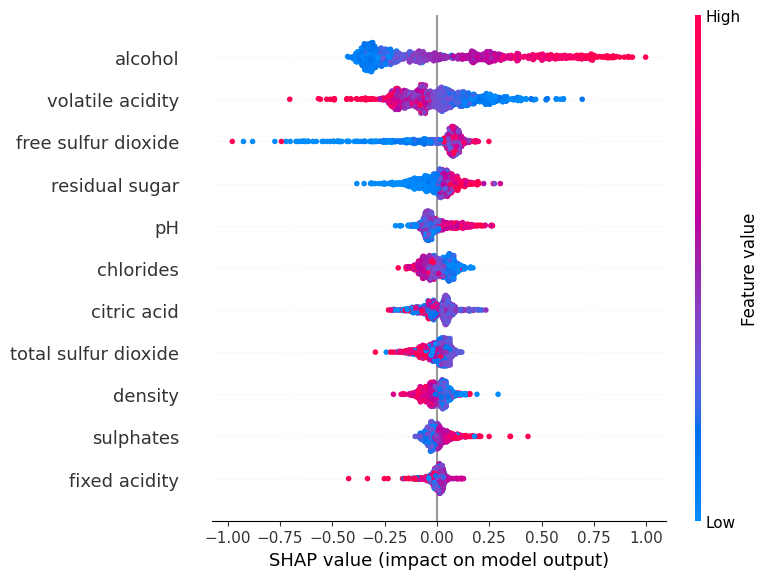

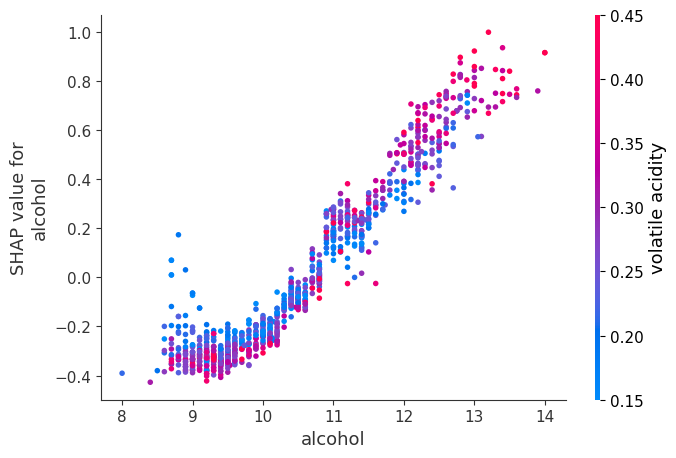

In [ ]:
import shap

# Create a SHAP explainer
explainer = shap.Explainer(model_custom)

# Calculate SHAP values for the validation set
shap_values = explainer(val_X)

# Plot SHAP summary plot
shap.summary_plot(shap_values, val_X)

# Plot SHAP dependence plot for a specific feature (e.g., 'alcohol')
shap.dependence_plot('alcohol', shap_values.values, val_X)
